<a href="https://colab.research.google.com/github/Ruthmwaura/module_2_week_2_ip/blob/main/House_price_prediction(Hass_consulting_company).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the question**

**a) Specifying the Data Analytic Question**

A prediction of the house prices upon being provided with the predictor variables. 

**b) Defining the Metric for Success**

Success will be pegged on the ability to create a model that has high accuracy on predicting the house prices upon being provided with the predictor variables. 

**c) Understanding the context**


**d) Recording the Experimental Design**

To successfully conduct this project the we will use CRISP DM, following steps will be taken in order:

-Business understanding

-Data understanding

-Data preparation

-explanatory data analysis

-modelling 

-evaluation

-challenging solution

**e)Data appropriateness** 

The data have variables that will adequately give answers to the analytical question.

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
#loading data
from google.colab import files
uploaded = files.upload()

Saving Independent Project Week 7 - house_data.csv to Independent Project Week 7 - house_data (2).csv


In [ ]:
#saving the data in a dataframe
import io
house = pd.read_csv(io.BytesIO(uploaded['Independent Project Week 7 - house_data.csv']))

##Understanding data

In [ ]:
#previewing data 1st five rows
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#previewing the last five rows
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#checking number of columns and rows
print('The house dataset has '+str(house.shape[0]) + ' rows and '+ str(house.shape[1])+ ' columns')

The house dataset has 21613 rows and 20 columns


In [ ]:
#listing all the columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#checking data types and null values
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  object 
 18  sqft_l

All the columns are in the right datatype apart from longtitude and years

The data has no null values:

In [ ]:
#checking for unique values
house.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               753
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
#looking at data statistical description
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000


##Data Preparation

###validity

we will drop the columns that we will not be using

In [ ]:
house.drop(['sqft_living15','sqft_lot15'], axis=1, inplace=True)

###accuracy

we will assume that the data provided is accurate

###consistency

we will look for duplicates

In [ ]:
#checking for duplicates
house.duplicated().any()

True

we have some duplicates, so we will drop them

In [ ]:
#dropping the duplicate
house.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [ ]:
#confirming no more duplicates
house.duplicated().any()

False

###completeness

we will check for null values

In [ ]:
#checking for null values
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

we have no null values in the dataset

###uniformity

we will change the data type of longitude and years and check for outliers and 
anomalies.

In [ ]:
#converting longitude to float64

house['long'] = pd.to_numeric(house['long'],errors = 'coerce')

In [ ]:
#confirming changes
house.dtypes

id                 int64
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
dtype: object

####outliers

In [ ]:
def find_outliers_IQR(house):

   q1=house.quantile(0.25)

   q3=house.quantile(0.75)

   IQR=q3-q1

   outliers = house[((house<(q1-1.5*IQR)) | (house>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(house[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated','zipcode', 'lat', 'long']])

outliers.isnull().sum()

id               21610
price            20471
bedrooms         21064
bathrooms        21039
sqft_living      21038
sqft_lot         19185
floors           21610
waterfront       21447
view             19487
condition        21580
grade            19699
sqft_above       20999
sqft_basement    21114
yr_built         21610
yr_renovated     20697
zipcode          21610
lat              21608
long             21354
dtype: int64

we have some outliers let's check on the stastical description and see the outliers by comparing the mean, max and min

In [ ]:
#stastical description
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21609.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213903
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


according to the description these three columns have extreme outliers we will do a box plot to visualize

-bedrooms 

-yr renovated

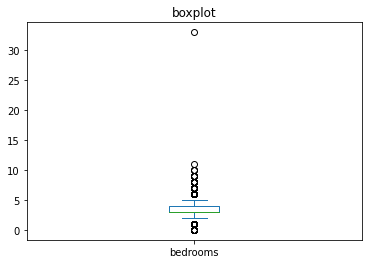

In [ ]:
#plotting a boxplot to visualize the outliers
ax = house[['bedrooms']].plot(kind='box', title='boxplot')


plt.show()

In [ ]:
bedrooms = house[house['bedrooms'] > 9]
bedrooms


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8757,1773100755,520000,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363
13314,627300145,1150000,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113
15161,5566100170,650000,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175
15870,2402100895,640000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331
19254,8812401450,660000,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320


we will drop these columns


In [ ]:
house.drop(house[house['bedrooms'] > 9].index, inplace = True)

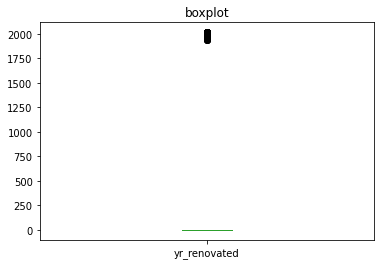

In [ ]:
ax = house[['yr_renovated']].plot(kind='box', title='boxplot')

plt.show()

In [ ]:
renovation = house[house['yr_renovated'] > 0]
renovation


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
35,9547205180,696000,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310
95,1483300570,905000,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249
103,2450000295,1090000,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196
115,3626039325,740500,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,1150000,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284
20057,126039256,434900,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362
20444,4305600360,500012,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127
20447,3319500628,356999,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311


we only have 912 out of 21610 rows that were renovated that is 4% so we can change the to renovated(1) and not renovated(0)

In [ ]:
house['yr_renovated'].where(house['yr_renovated'] <=0, 1, inplace=True)
house['yr_renovated'].unique()

array([0, 1])

In [ ]:
#previewing the new dataset
house.head(30)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319
2,5631500400,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,7237550310,1230000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,1321400060,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,2008000270,291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,2414600126,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,3793500160,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


In [ ]:
#checking for anomalies
house.nunique()

id               21431
price             3625
bedrooms            10
bathrooms           30
sqft_living       1038
sqft_lot          9781
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated         2
zipcode             70
lat               5034
long               752
dtype: int64

##Eplanatory Data Analysis

###univariate

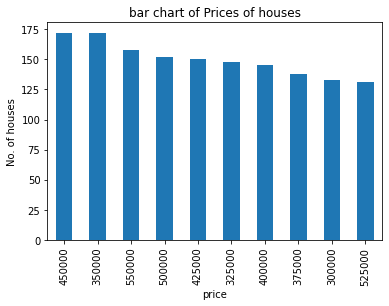

In [ ]:
#lets see the distribution of prices
house['price'].value_counts().head(10).plot.bar()
plt.ylabel('No. of houses')
plt.xlabel('price')
plt.title('bar chart of Prices of houses')
plt.show()

most houses range between 450,000 and 350,000

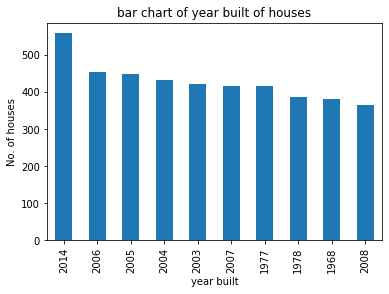

In [ ]:
#lets see the distribution of year build
house['yr_built'].value_counts().head(10).plot.bar()
plt.ylabel('No. of houses')
plt.xlabel('year built')
plt.title('bar chart of year built of houses')
plt.show()

most houses were built in 2014 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


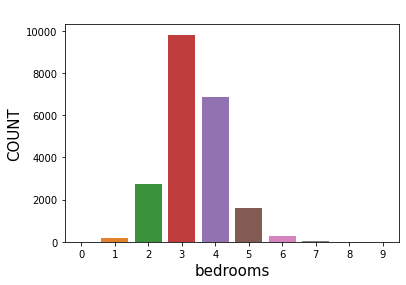

In [ ]:
#number of bedrooms
sns.countplot('bedrooms',data = house)
plt.xlabel("bedrooms",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of bedrooms",fontsize=16,color="white")
plt.show()

most houses in the data has 3 bedrooms followed by 4 bedrooms

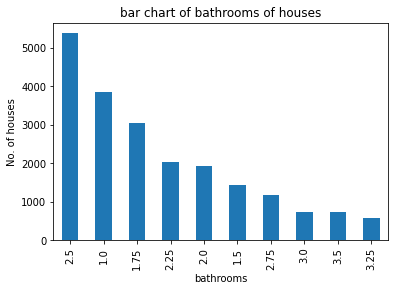

In [ ]:
#number of bathrooms
house['bathrooms'].value_counts().head(10).plot.bar()
plt.ylabel('No. of houses')
plt.xlabel('bathrooms')
plt.title('bar chart of bathrooms of houses')
plt.show()

most houses has two “full” bathrooms and one “half” bathroom.

generally a full bathroom has a sink, toilet, and either a tub/shower combo or separate tub and shower.

In [209]:
#plotting pie chart for number of floors
df=house['floors'].value_counts().head(4)
df

1.0    10678
2.0     8235
1.5     1910
3.0      613
Name: floors, dtype: int64

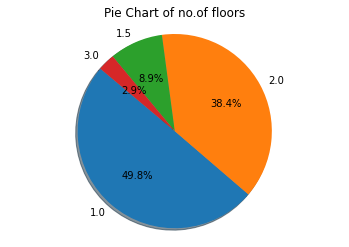

In [210]:
plt.pie(df,labels=['1.0','2.0','1.5','3.0'], autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of no.of floors')
plt.show()

many houses are one story house.

In [197]:
#pie chart for no of views
data=house['view'].value_counts().head()
data

0    19483
2      962
3      509
1      332
4      319
Name: view, dtype: int64

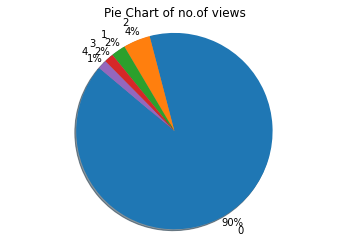

In [207]:
plt.pie(data,labels=['0','2','1','3','4'], shadow = True, startangle = 140,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, radius=1.4)
plt.axis('equal')
plt.title('Pie Chart of no.of views')
plt.show()

most houses has no views, followed by two views.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


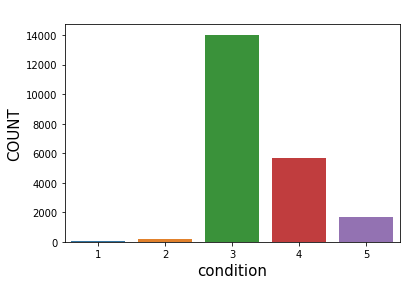

In [208]:
#number of bedrooms
sns.countplot('condition',data = house)
plt.xlabel("condition",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of bedrooms",fontsize=16,color="white")
plt.show()

most houses are of fair codition assuming;

 1=very good

 2=good

 3=fair

 4=poor

 5=very poor 

In [211]:
#houses renovated
ren=house['yr_renovated'].value_counts()
ren

0    20693
1      912
Name: yr_renovated, dtype: int64

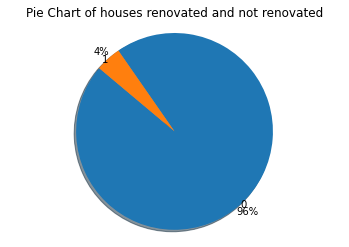

In [212]:
plt.pie(ren,labels=['0','1'], shadow = True, startangle = 140,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1)
plt.axis('equal')
plt.title('Pie Chart of houses renovated and not renovated')
plt.show()

most houses are not renovated

###bivariate

####correlation

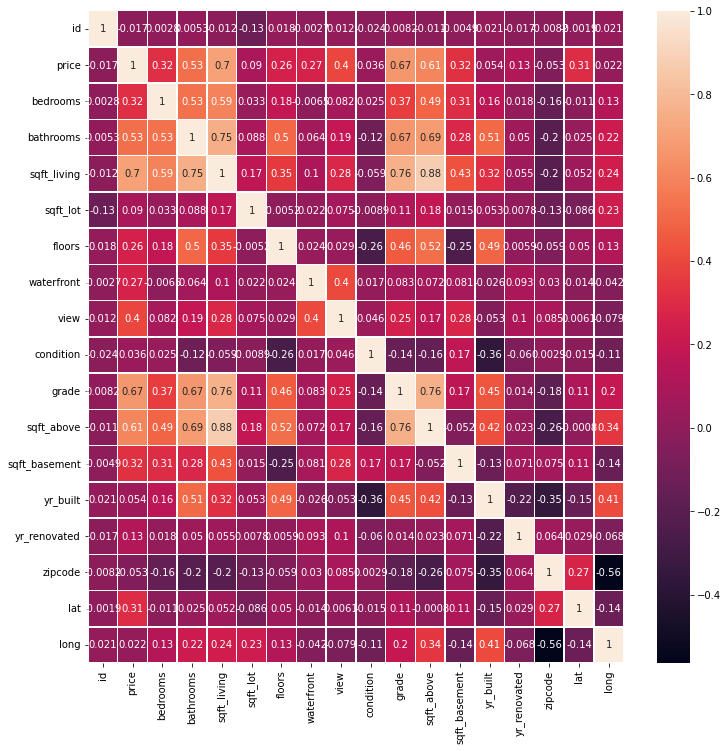

In [225]:
#Plottting a heatmap to show correlation of different numerical variables

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(house.corr(), xticklabels = house.corr().columns, yticklabels = house.corr().columns, annot=True,linewidths=.5, ax=ax)

Using a threshold of 0.5, we observe that:

The price has a high Correlation with the following columns: sqft living,sqft above, bathrooms and  grade with the correlation above 0.5

The number of floors and the number of bathrooms are highly correlated

The number of bathrooms, the grade and the Square feet area of living area



####multicolinearity

###multivariate